In [1]:
#import modules for machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

#fucntion to load data and carry out all the operations
def load_data(path1,path2):
    df_test = pd.read_table(path1)
    df_train = pd.read_table(path2)
    Y_train = df_train['id']
    X_train = df_train.drop('id', axis=1)
    
    X_test = df_test.drop('id', axis=1)
    Y_test = df_test['id']
    return X_train, Y_train, X_test, Y_test

#function to carry out the operations

path1 = 'test/CTDD_modified.csv'
path2 = 'train/CTDD_modified.csv'
load_data(path1,path2)
X_train, Y_train, X_test, Y_test = load_data(path1,path2)
print(X_train.head())
print(Y_train.head())
print(X_test.head())
print(Y_test.head())


   hydrophobicity_PRAM900101.1.residue0  \
0                             33.333333   
1                              0.000000   
2                             12.500000   
3                             60.000000   
4                              0.000000   

   hydrophobicity_PRAM900101.1.residue25  \
0                              33.333333   
1                               0.000000   
2                              12.500000   
3                              60.000000   
4                               0.000000   

   hydrophobicity_PRAM900101.1.residue50  \
0                              33.333333   
1                               0.000000   
2                              37.500000   
3                              60.000000   
4                               0.000000   

   hydrophobicity_PRAM900101.1.residue75  \
0                              66.666667   
1                               0.000000   
2                              50.000000   
3                              80.0

In [2]:
# Import the necessary modules
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve, GridSearchCV
import numpy as np

# Define the algorithms
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
lr = LogisticRegression()
pls = PLSRegression(n_components=2)
rf = RandomForestClassifier()
svm = SVC()



# Fit the models
et.fit(X_train, Y_train)
knn.fit(X_train, Y_train)
lr.fit(X_train, Y_train)
pls.fit(X_train, Y_train)
rf.fit(X_train, Y_train)
svm.fit(X_train, Y_train)

# Predict the labels
et_pred = et.predict(X_test)
knn_pred = knn.predict(X_test)
lr_pred = lr.predict(X_test)
pls_pred = pls.predict(X_test)
sample=pls_pred
rf_pred = rf.predict(X_test)
svm_pred = svm.predict(X_test)

pls_pred=(sample>0.5).astype('uint8')

# Print the accuracy
et_acc = accuracy_score(Y_test, et_pred)
knn_acc = accuracy_score(Y_test, knn_pred)
lr_acc = accuracy_score(Y_test, lr_pred)
pls_acc = accuracy_score(Y_test, pls_pred)
rf_acc = accuracy_score(Y_test, rf_pred)
svm_acc = accuracy_score(Y_test, svm_pred)

/Users/pait/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:
print("Accuracy of Extra Trees Classifier:", et_acc)
print("Accuracy of K-Nearest Neighbors Classifier:", knn_acc)
print("Accuracy of Logistic Regression:", lr_acc)
print("Accuracy of Partial Least Squares Regression:", pls_acc)
print("Accuracy of Random Forest Classifier:", rf_acc)
print("Accuracy of Support Vector Machine Classifier:", svm_acc)


Accuracy of Extra Trees Classifier: 0.8314606741573034
Accuracy of K-Nearest Neighbors Classifier: 0.7865168539325843
Accuracy of Logistic Regression: 0.7752808988764045
Accuracy of Partial Least Squares Regression: 0.7640449438202247
Accuracy of Random Forest Classifier: 0.8089887640449438
Accuracy of Support Vector Machine Classifier: 0.8089887640449438


In [21]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score


et_bacc = balanced_accuracy_score(Y_test, et_pred)
knn_bacc = balanced_accuracy_score(Y_test, knn_pred)
lr_bacc = balanced_accuracy_score(Y_test, lr_pred)
pls_bacc = balanced_accuracy_score(Y_test, pls_pred)
rf_bacc = balanced_accuracy_score(Y_test, rf_pred)
svm_bacc = balanced_accuracy_score(Y_test, svm_pred)

print("Balanced Accuracy of Extra Trees Classifier:", et_bacc)
print("Balanced Accuracy of K-Nearest Neighbors Classifier:", knn_bacc)
print("Balanced Accuracy of Logistic Regression:", lr_bacc)
print("Balanced Accuracy of Partial Least Squares Regression:", pls_bacc)
print("Balanced Accuracy of Random Forest Classifier:", rf_bacc)
print("Balanced Accuracy of Support Vector Machine Classifier:", svm_bacc)

et_mcc = matthews_corrcoef(Y_test, et_pred)
knn_mcc = matthews_corrcoef(Y_test, knn_pred)
lr_mcc = matthews_corrcoef(Y_test, lr_pred)
pls_mcc = matthews_corrcoef(Y_test, pls_pred)
rf_mcc = matthews_corrcoef(Y_test, rf_pred)
svm_mcc = matthews_corrcoef(Y_test, svm_pred)

print("Matthews Correlation Coefficient of Extra Trees Classifier:", et_mcc)
print("Matthews Correlation Coefficient of K-Nearest Neighbors Classifier:", knn_mcc)
print("Matthews Correlation Coefficient of Logistic Regression:", lr_mcc)
print("Matthews Correlation Coefficient of Partial Least Squares Regression:", pls_mcc)
print("Matthews Correlation Coefficient of Random Forest Classifier:", rf_mcc)
print("Matthews Correlation Coefficient of Support Vector Machine Classifier:", svm_mcc)

et_auc = roc_auc_score(Y_test, et_pred)
knn_auc = roc_auc_score(Y_test, knn_pred)
lr_auc = roc_auc_score(Y_test, lr_pred)
pls_auc = roc_auc_score(Y_test, pls_pred)
rf_auc = roc_auc_score(Y_test, rf_pred)
svm_auc = roc_auc_score(Y_test, svm_pred)

print("Area Under the Curve of Extra Trees Classifier:", et_auc)
print("Area Under the Curve of K-Nearest Neighbors Classifier:", knn_auc)
print("Area Under the Curve of Logistic Regression:", lr_auc)
print("Area Under the Curve of Partial Least Squares Regression:", pls_auc)
print("Area Under the Curve of Random Forest Classifier:", rf_auc)
print("Area Under the Curve of Support Vector Machine Classifier:", svm_auc)

Balanced Accuracy of Extra Trees Classifier: 0.7611241217798594
Balanced Accuracy of K-Nearest Neighbors Classifier: 0.709016393442623
Balanced Accuracy of Logistic Regression: 0.7394613583138174
Balanced Accuracy of Partial Least Squares Regression: 0.7119437939110069
Balanced Accuracy of Random Forest Classifier: 0.7350702576112412
Balanced Accuracy of Support Vector Machine Classifier: 0.7640515222482436
Matthews Correlation Coefficient of Extra Trees Classifier: 0.591827444659406
Matthews Correlation Coefficient of K-Nearest Neighbors Classifier: 0.47372734920046616
Matthews Correlation Coefficient of Logistic Regression: 0.47892271662763464
Matthews Correlation Coefficient of Partial Least Squares Regression: 0.4379601962387237
Matthews Correlation Coefficient of Random Forest Classifier: 0.532777396929936
Matthews Correlation Coefficient of Support Vector Machine Classifier: 0.5456354931040452
Area Under the Curve of Extra Trees Classifier: 0.7611241217798594
Area Under the Curve

In [4]:
et_cm = confusion_matrix(Y_test, et_pred)
knn_cm = confusion_matrix(Y_test, knn_pred)
lr_cm = confusion_matrix(Y_test, lr_pred)
pls_cm = confusion_matrix(Y_test, pls_pred)
rf_cm = confusion_matrix(Y_test, rf_pred)
svm_cm = confusion_matrix(Y_test, svm_pred)

In [5]:

print("Confusion Matrix of Extra Trees Classifier:")
print(et_cm)
print("Confusion Matrix of K-Nearest Neighbors Classifier:")
print(knn_cm)
print("Confusion Matrix of Logistic Regression:")
print(lr_cm)
print("Confusion Matrix of Partial Least Squares Regression:")
print(pls_cm)
print("Confusion Matrix of Random Forest Classifier:")
print(rf_cm)
print("Confusion Matrix of Support Vector Machine Classifier:")
print(svm_cm)

Confusion Matrix of Extra Trees Classifier:
[[58  3]
 [12 16]]
Confusion Matrix of K-Nearest Neighbors Classifier:
[[56  5]
 [14 14]]
Confusion Matrix of Logistic Regression:
[[51 10]
 [10 18]]
Confusion Matrix of Partial Least Squares Regression:
[[52  9]
 [12 16]]
Confusion Matrix of Random Forest Classifier:
[[57  4]
 [13 15]]
Confusion Matrix of Support Vector Machine Classifier:
[[54  7]
 [10 18]]


In [6]:
et_cr = classification_report(Y_test, et_pred)
knn_cr = classification_report(Y_test, knn_pred)
lr_cr = classification_report(Y_test, lr_pred)
pls_cr = classification_report(Y_test, pls_pred)
rf_cr = classification_report(Y_test, rf_pred)
svm_cr = classification_report(Y_test, svm_pred)

print("Classification Report of Extra Trees Classifier:")
print(et_cr)
print("Classification Report of K-Nearest Neighbors Classifier:")
print(knn_cr)
print("Classification Report of Logistic Regression:")
print(lr_cr)
print("Classification Report of Partial Least Squares Regression:")
print(pls_cr)
print("Classification Report of Random Forest Classifier:")
print(rf_cr)
print("Classification Report of Support Vector Machine Classifier:")
print(svm_cr)


Classification Report of Extra Trees Classifier:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        61
           1       0.84      0.57      0.68        28

    accuracy                           0.83        89
   macro avg       0.84      0.76      0.78        89
weighted avg       0.83      0.83      0.82        89

Classification Report of K-Nearest Neighbors Classifier:
              precision    recall  f1-score   support

           0       0.80      0.92      0.85        61
           1       0.74      0.50      0.60        28

    accuracy                           0.79        89
   macro avg       0.77      0.71      0.73        89
weighted avg       0.78      0.79      0.77        89

Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        61
           1       0.64      0.64      0.64        28

    accuracy                  

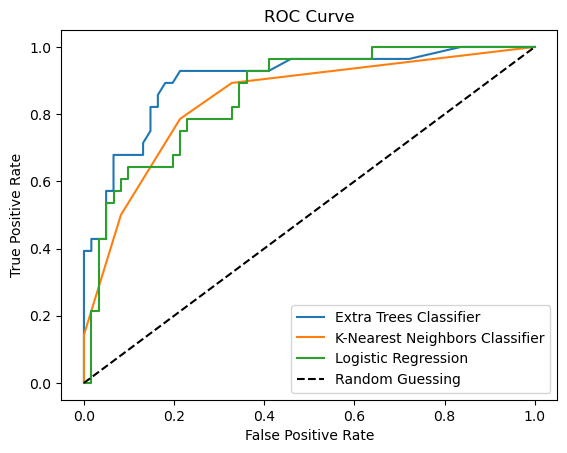

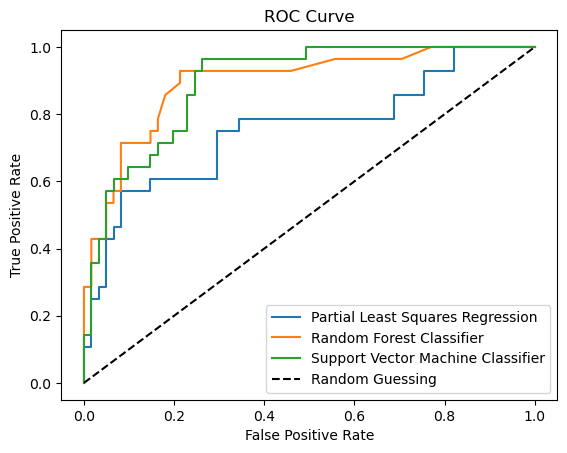

In [7]:
et_probs = et.predict_proba(X_test)[:, 1]
knn_probs = knn.predict_proba(X_test)[:, 1]
lr_probs = lr.predict_proba(X_test)[:, 1]

pls_probs = pls.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]
svm_probs = svm.decision_function(X_test)

et_fpr, et_tpr, et_thresholds = roc_curve(Y_test, et_probs)
knn_fpr, knn_tpr, knn_thresholds = roc_curve(Y_test, knn_probs)
lr_fpr, lr_tpr, lr_thresholds = roc_curve(Y_test, lr_probs)
pls_fpr, pls_tpr, pls_thresholds = roc_curve(Y_test, pls_probs)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(Y_test, rf_probs)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(Y_test, svm_probs)



plt.plot(et_fpr, et_tpr, label='Extra Trees Classifier' )
plt.plot(knn_fpr, knn_tpr, label='K-Nearest Neighbors Classifier')
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

plt.plot(pls_fpr, pls_tpr, label='Partial Least Squares Regression')
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier')
plt.plot(svm_fpr, svm_tpr, label='Support Vector Machine Classifier')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

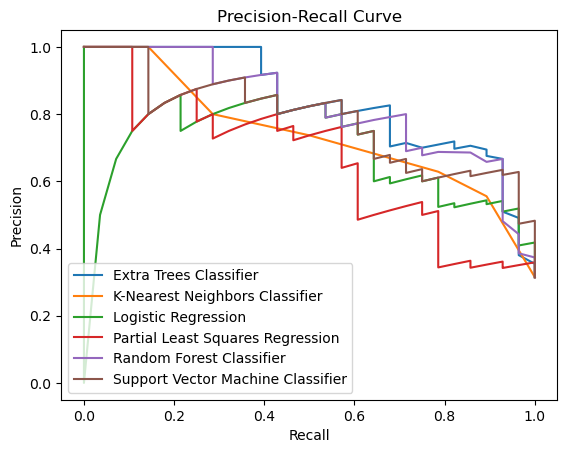

In [8]:
et_precision, et_recall, et_thresholds = precision_recall_curve(Y_test, et_probs)
knn_precision, knn_recall, knn_thresholds = precision_recall_curve(Y_test, knn_probs)
lr_precision, lr_recall, lr_thresholds = precision_recall_curve(Y_test, lr_probs)
pls_precision, pls_recall, pls_thresholds = precision_recall_curve(Y_test, pls_probs)
rf_precision, rf_recall, rf_thresholds = precision_recall_curve(Y_test, rf_probs)
svm_precision, svm_recall, svm_thresholds = precision_recall_curve(Y_test, svm_probs)

plt.plot(et_recall, et_precision, label='Extra Trees Classifier')
plt.plot(knn_recall, knn_precision, label='K-Nearest Neighbors Classifier')
plt.plot(lr_recall, lr_precision, label='Logistic Regression')
plt.plot(pls_recall, pls_precision, label='Partial Least Squares Regression')
plt.plot(rf_recall, rf_precision, label='Random Forest Classifier')
plt.plot(svm_recall, svm_precision, label='Support Vector Machine Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [9]:
#hyperparameter tuning
# Create a pipeline
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = {
                 "n_estimators": [5,10,20,50, 100, 1000],
                 "max_depth":[5,8,15,25,30],
                 'max_features': ['log2', 'sqrt'],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 4],
                    'bootstrap': [True, False],
                 "max_leaf_nodes": [2, 5,10]}

# Create a gridsearch of the pipeline, the fit the best model
pipe = Pipeline([("classifier", RandomForestClassifier())])
gridsearch = GridSearchCV(estimator= RandomForestClassifier(),param_grid= grid_param, cv=5, verbose=1,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train, Y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test, Y_test))
print("The best parameters are ", best_model.best_params_)


Fitting 5 folds for each of 3240 candidates, totalling 16200 fits
RandomForestClassifier(bootstrap=False, max_depth=8, max_features='log2',
                       max_leaf_nodes=10, min_samples_leaf=4, n_estimators=10)
The mean accuracy of the model is: 0.8539325842696629
The best parameters are  {'bootstrap': False, 'max_depth': 8, 'max_features': 'log2', 'max_leaf_nodes': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10}


In [10]:
#hyperparameter tuning
# Create a pipeline
# Create dictionary with candidate learning algorithms and their hyperparameters
parameters={'n_estimators': [10, 20, 50, 100, 200, 500, 1000, 1200, 1500, 1800, 1900, 2000, 2100, 3000]}


# Create a gridsearch of the pipeline, the fit the best model
pipe = ExtraTreesClassifier()
gridsearch = GridSearchCV(pipe, parameters, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train, Y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test, Y_test))

ExtraTreesClassifier(n_estimators=1500)
The mean accuracy of the model is: 0.8089887640449438


In [11]:
#hyperparameter tuning
# Create a pipeline

# Create dictionary with candidate learning algorithms and their hyperparameters
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
              'p': [1, 2]}
# Create a gridsearch of the pipeline, the fit the best model
pipe = KNeighborsClassifier()
gridsearch = GridSearchCV(pipe, parameters, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train, Y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test, Y_test))


KNeighborsClassifier(leaf_size=10, n_neighbors=6, p=1, weights='distance')
The mean accuracy of the model is: 0.8089887640449438


In [12]:
#hyperparameter tuning
# Create a pipeline
# Create dictionary with candidate learning algorithms and their hyperparameters
parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','poly','sigmoid']}
# Create a gridsearch of the pipeline, the fit the best model
pipe = SVC()
gridsearch = GridSearchCV(pipe, parameters, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train, Y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test, Y_test))


SVC(C=0.1, gamma=1, kernel='poly')
The mean accuracy of the model is: 0.8089887640449438


In [13]:
#hyperparameter tuning
# Create a pipeline
# Create dictionary with candidate learning algorithms and their hyperparameters
parameters = {'n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
# Create a gridsearch of the pipeline, the fit the best model   
pipe = PLSRegression()

    


In [14]:
#hyperparameter tuning

# Create a pipeline
# Create dictionary with candidate learning algorithms and their hyperparameters
parameters={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
# Create a gridsearch of the pipeline, the fit the best model
pipe = LogisticRegression()
gridsearch = GridSearchCV(pipe, parameters, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train, Y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test, Y_test))
print("The best parameters are ", best_model.best_params_)


/Users/pait/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pait/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

LogisticRegression(C=0.0018329807108324356, penalty='l1', solver='liblinear')
The mean accuracy of the model is: 0.8089887640449438
The best parameters are  {'C': 0.0018329807108324356, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


/Users/pait/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3600 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/pait/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/pait/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/pait/anaconda3/envs/my_env/lib/python3.

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score, matthews_corrcoef, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score, matthews_corrcoef, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

rf_clf=RandomForestClassifier(bootstrap=False, max_depth=8, max_features='log2',
max_leaf_nodes=10, min_samples_leaf=4, n_estimators=10)

knn_clf=KNeighborsClassifier(leaf_size=10, n_neighbors=6, p=1, weights='distance')

et_clf=ExtraTreesClassifier(n_estimators=1500)

svc_clf=SVC(C=0.1,gamma=1,kernel='poly')





# Fit the classifiers and perform cross-validation
clfs = [rf_clf, et_clf, knn_clf, svc_clf]
for clf in clfs:
    pipe = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipe, X_train, Y_train, cv=5, scoring='accuracy')
    y_pred = cross_val_predict(pipe, X_train, Y_train, cv=5)
    bacc = balanced_accuracy_score(Y_train, y_pred)
    mcc = matthews_corrcoef(Y_train, y_pred)
    tn, fp, fn, tp = confusion_matrix(Y_train, y_pred).ravel()
    sn = tp / (tp + fn)
    sp = tn / (tn + fp)
    auc = roc_auc_score(Y_train, y_pred)
    print(f"{type(clf).__name__}: Accuracy: {scores.mean()}, Std: {scores.std()}, BACC: {bacc}, MCC: {mcc}, Sensitivity: {sn}, Specificity: {sp}, AUC: {auc}")

# Apply Voting Classifier
voting_clf = VotingClassifier(estimators=[('rf', rf_clf), ('et', et_clf), ('knn', knn_clf), ('svc', svc_clf)], voting='hard')
pipe_voting = make_pipeline(StandardScaler(), voting_clf)
pipe_voting.fit(X_train, Y_train)
y_pred_voting = pipe_voting.predict(X_test)
print(f"Voting Classifier: Accuracy: {accuracy_score(Y_test, y_pred_voting)}")
bacc = balanced_accuracy_score(Y_test, y_pred_voting)
mcc = matthews_corrcoef(Y_test, y_pred_voting)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_voting).ravel()
sn = tp / (tp + fn)
sp = tn / (tn + fp)
auc = roc_auc_score(Y_test, y_pred_voting)
print(f"Voting Classifier: BACC: {bacc}, MCC: {mcc}, Sensitivity: {sn}, Specificity: {sp}, AUC: {auc}")

# Apply Stacking Classifier
stacking_clf = StackingClassifier(estimators=[('rf', rf_clf), ('et', et_clf), ('knn', knn_clf), ('svc', svc_clf)],final_estimator=SVC())
pipe_stacking = make_pipeline(StandardScaler(), stacking_clf)
pipe_stacking.fit(X_train, Y_train)
y_pred_stacking = pipe_stacking.predict(X_test)
print(f"Stacking Classifier: Accuracy: {accuracy_score(Y_test, y_pred_stacking)}")
#print bacc mcc sn sp auc
bacc = balanced_accuracy_score(Y_test, y_pred_stacking)
mcc = matthews_corrcoef(Y_test, y_pred_stacking)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_stacking).ravel()
sn = tp / (tp + fn)
sp = tn / (tn + fp)
auc = roc_auc_score(Y_test, y_pred_stacking)
print(f"Stacking Classifier: BACC: {bacc}, MCC: {mcc}, Sensitivity: {sn}, Specificity: {sp}, AUC: {auc}")


# Final estimate using SVC
final_svc_clf = SVC(C=1000, gamma=1, kernel='linear')
pipe_final_svc = make_pipeline(StandardScaler(), final_svc_clf)
pipe_final_svc.fit(X_train, Y_train)
y_pred_final_svc = pipe_final_svc.predict(X_test)
print(f"Final estimate using SVC: Accuracy: {accuracy_score(Y_test, y_pred_final_svc)}")

RandomForestClassifier: Accuracy: 0.8241448692152916, Std: 0.03644795768076585, BACC: 0.8156490812092472, MCC: 0.652066362429698, Sensitivity: 0.7142857142857143, Specificity: 0.91701244813278, AUC: 0.8156490812092472
ExtraTreesClassifier: Accuracy: 0.8611267605633802, Std: 0.027890662680741727, BACC: 0.824262744516894, MCC: 0.6719084871418974, Sensitivity: 0.7232142857142857, Specificity: 0.9253112033195021, AUC: 0.8242627445168939
KNeighborsClassifier: Accuracy: 0.8555331991951711, Std: 0.0276201192703162, BACC: 0.810554979253112, MCC: 0.6562327142741171, Sensitivity: 0.6875, Specificity: 0.9336099585062241, AUC: 0.810554979253112
SVC: Accuracy: 0.8327162977867204, Std: 0.05700206533941734, BACC: 0.7915678719620629, MCC: 0.6041610732712633, Sensitivity: 0.6785714285714286, Specificity: 0.9045643153526971, AUC: 0.7915678719620628
Voting Classifier: Accuracy: 0.8089887640449438
Voting Classifier: BACC: 0.7254098360655737, MCC: 0.532544719915571, Sensitivity: 0.5, Specificity: 0.9508196